# Projeto do curso de Python para Análise de Dados
## Project 09 - Brazil forest fires

In [15]:
# Modeling Librarys
import numpy as np
import pandas as pd

# DataViz Librarys
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('Dados_Indendio.csv',encoding = 'latin-1')
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [17]:
data.shape

(6454, 5)

In [18]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

### Missing Data

In [19]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

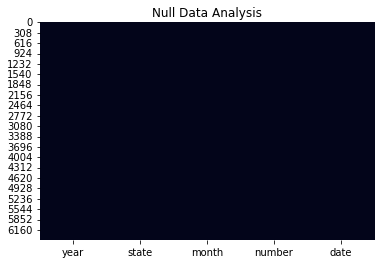

In [20]:
# No data is missing....
plt.title('Null Data Analysis')
sns.heatmap(data.isnull(),cbar = False);

## Exploratory Analysis

### Statistics

In [21]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [22]:
# unique fields
data.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

### Dataviz

In [23]:
analysis_year =  data.groupby(by=['year']).sum().reset_index()
analysis_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


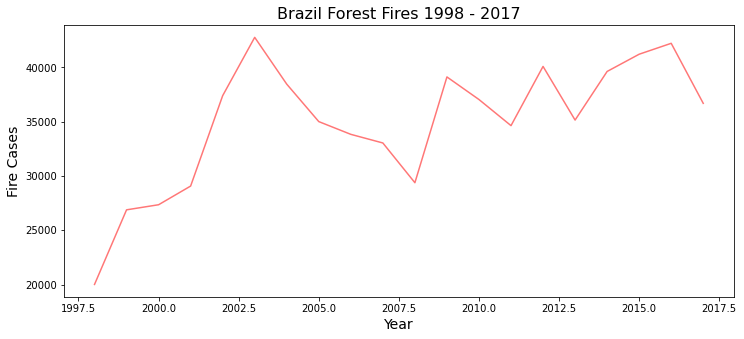

In [24]:
# Graphic 1

plt.figure(figsize=(12,5))

plt.title('Brazil Forest Fires 1998 - 2017',fontsize = 16)

sns.lineplot( data = analysis_year, x='year', y='number',color = '#ff5555',alpha = 0.8)

plt.xlabel('Year',fontsize = 14)
plt.ylabel('Fire Cases',fontsize = 14)

plt.show()

In [25]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [26]:
analysis_month =  data[['year','month','number']].groupby(by=['year','month']).sum().reset_index()
analysis_month

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000
...,...,...,...
234,2017,Maio,2506.000
235,2017,Março,2017.000
236,2017,Novembro,6217.379
237,2017,Outubro,3600.159


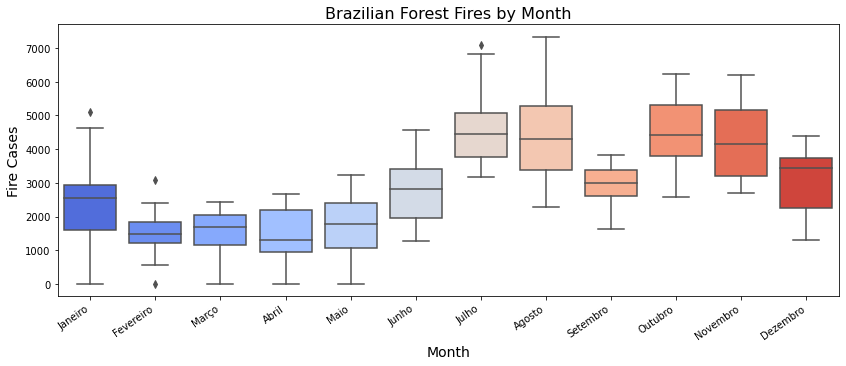

In [40]:
# Graphic 2

plt.figure(figsize=(14,5))

plt.title('Brazilian Forest Fires by Month', fontsize = 16)

sns.boxplot(data=analysis_month, x = 'month',y = 'number',palette = 'coolwarm', saturation = 1, order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

plt.xticks(rotation = 35, ha = 'right')

plt.xlabel('Month',fontsize = 14)
plt.ylabel('Fire Cases',fontsize = 14)

plt.show()

In [28]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [36]:
analysis_state =  data.groupby(by=['state']).sum().reset_index()
analysis_state = analysis_state[['state','number']].sort_values('number',ascending=False)
analysis_state

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


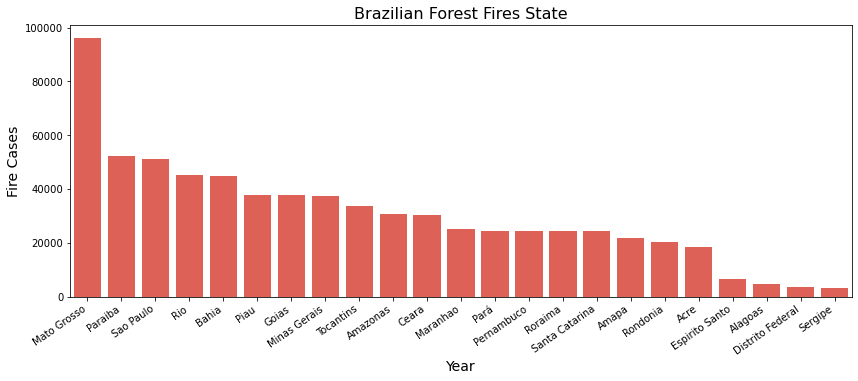

In [45]:
# Graphic 3

plt.figure(figsize=(14,5))

plt.title('Brazilian Forest Fires State', fontsize = 16)

sns.barplot(data=analysis_state, x = 'state',y = 'number',color='#f44e3f')

plt.xticks(rotation = 35, ha = 'right')

plt.xlabel('Year',fontsize = 14)
plt.ylabel('Fire Cases',fontsize = 14)

plt.show()

In [46]:
analysis_state_by_year =  data.groupby(by=['year','state']).sum().reset_index()
#analysis_state_by_year = analysis_state_by_year[['state','number']].sort_values('number',ascending=False)
analysis_state_by_year

,year,state,number
0,1998,Acre,730.000
1,1998,Alagoas,86.000
2,1998,Amapa,278.000
3,1998,Amazonas,946.000
4,1998,Bahia,1224.687
...,...,...,...
455,2017,Roraima,1101.000
456,2017,Santa Catarina,2354.000
457,2017,Sao Paulo,2540.868
458,2017,Sergipe,75.000


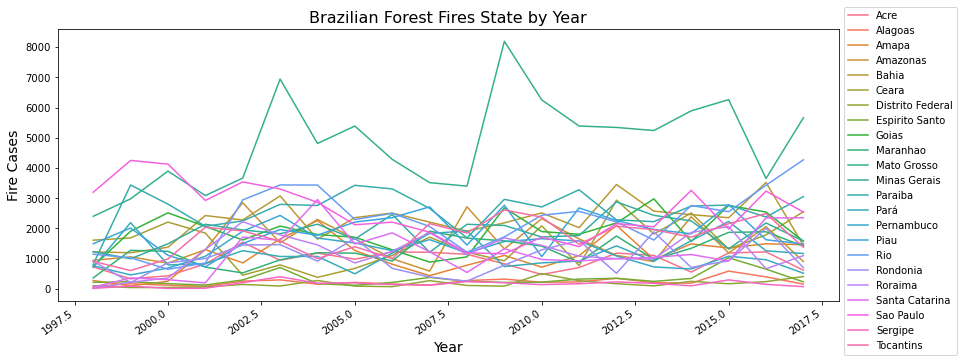

In [52]:
# Graphic 4

plt.figure(figsize=(14,5))

plt.title('Brazilian Forest Fires State by Year', fontsize = 16)

sns.lineplot(data=analysis_state_by_year, x = 'year',y = 'number',hue='state', estimator='sum')

plt.xticks(rotation = 35, ha = 'right')

plt.xlabel('Year',fontsize = 14)
plt.ylabel('Fire Cases',fontsize = 14)
plt.legend(bbox_to_anchor=(1,1.1))

plt.show()